In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, accuracy_score, f1_score,roc_auc_score

In [3]:
df_train = 'train.csv'
df_test = 'test.csv'

data_train = pd.read_csv(df_train)
data_test = pd.read_csv(df_test)

print(data_train.shape)
print(data_test.shape)

(22005, 30)
(6000, 29)


In [4]:
data_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [5]:
data_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached


In [6]:
data_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [7]:
data_train.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                      

In [8]:
data_test.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Avg_achieve

In [9]:
data_train.dtypes

job_level                                 object
job_duration_in_current_job_level        float64
person_level                              object
job_duration_in_current_person_level     float64
job_duration_in_current_branch           float64
Employee_type                             object
Employee_status                           object
gender                                    object
age                                        int64
marital_status_maried(Y/N)                object
number_of_dependences                      int64
number_of_dependences (male)               int64
number_of_dependences (female)             int64
Education_level                           object
GPA                                      float64
year_graduated                            object
job_duration_as_permanent_worker         float64
job_duration_from_training                 int64
branch_rotation                            int64
job_rotation                               int64
assign_of_otherposit

In [10]:
data_train.nunique()

job_level                                    4
job_duration_in_current_job_level          102
person_level                                 8
job_duration_in_current_person_level        86
job_duration_in_current_branch              71
Employee_type                                3
Employee_status                              2
gender                                       2
age                                         37
marital_status_maried(Y/N)                   2
number_of_dependences                        7
number_of_dependences (male)                 5
number_of_dependences (female)               5
Education_level                              6
GPA                                        241
year_graduated                              52
job_duration_as_permanent_worker            33
job_duration_from_training                  34
branch_rotation                             20
job_rotation                                15
assign_of_otherposition                     30
annual leave 

In [11]:
data1 = data_train.copy()
data2 = data_test.copy()

In [12]:
def mising_val_table(data):
    mising_val = data.isnull().sum()
    presentase_mising_val = 100 * data.isnull().sum()/len(data)
    
    table = pd.concat([mising_val, presentase_mising_val], axis=1)
    table = table.rename(columns = {
        0 : "Mising Values",
        1 : "% of Total Values" 
    })
    
    table = table.sort_values(
        by="% of Total Values",
        ascending = False
    )
    
    return table

In [13]:
data1.shape

(22005, 30)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

In [15]:
mising_val_table(data1)

,Mising Values,% of Total Values
achievement_target_3,6727,30.570325
achievement_target_2,6727,30.570325
achievement_target_1,6727,30.570325
Achievement_above_100%_during3quartal,6302,28.638946
Last_achievement_%,6302,28.638946
Avg_achievement_%,6289,28.579868
Education_level,3608,16.396274
GPA,3503,15.919109
year_graduated,3503,15.919109
job_duration_as_permanent_worker,2055,9.338787


In [16]:
mising_val_table(data2)

,Mising Values,% of Total Values
job_level,0,0.0
year_graduated,0,0.0
achievement_target_2,0,0.0
achievement_target_1,0,0.0
Achievement_above_100%_during3quartal,0,0.0
Last_achievement_%,0,0.0
Avg_achievement_%,0,0.0
sick_leaves,0,0.0
annual leave,0,0.0
assign_of_otherposition,0,0.0


In [17]:
data1["Employee_type"].value_counts()

RM_type_A    11030
RM_type_B    10211
RM_type_C      752
Name: Employee_type, dtype: int64

In [18]:
rma = 11030
rmb = 10211
rmc = 752
n = 3
hasil = (rma+rmb+rmc)/3
hasil

7331.0

**Fiture engineering untuk kolom "Employe_type": Tipe Pekerja**

In [19]:
type_pekerjaan = pd.isnull(data1["Employee_type"])
data1[type_pekerjaan]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
7279,JG03,4.00,PG01,4.00,0.33,NaN,Permanent,Male,1990,N,...,0,5,10,0,NaN,NaN,NaN,NaN,NaN,NaN
9187,JG03,5.17,PG02,4.00,0.92,NaN,Permanent,Male,1980,Y,...,1,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN
10732,JG03,3.58,PG02,0.50,0.67,NaN,Permanent,Female,1990,Y,...,0,5,4,0,NaN,NaN,NaN,NaN,NaN,NaN
11734,JG04,1.08,PG03,1.08,0.00,NaN,Permanent,Male,1985,Y,...,0,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN
11769,JG03,3.58,PG02,0.50,1.42,NaN,Permanent,Male,1986,Y,...,0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
12718,JG03,4.17,PG02,1.00,0.17,NaN,Permanent,Female,1985,Y,...,0,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14384,JG03,3.00,PG01,3.00,0.25,NaN,Permanent,Male,1985,Y,...,1,6,1,0,NaN,NaN,NaN,NaN,NaN,NaN
14433,JG03,7.00,PG02,3.50,0.33,NaN,Permanent,Male,1983,Y,...,2,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
14454,JG03,3.75,PG02,0.50,0.25,NaN,Permanent,Female,1989,Y,...,1,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN
15246,JG03,4.17,PG02,1.00,0.42,NaN,Permanent,Male,1987,Y,...,0,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data1a = data1.copy()
data2a = data2.copy()

In [21]:
data1a["Employee_type"].fillna("RM_type_B", inplace=True)

In [22]:
data1a["Employee_type"].value_counts()

RM_type_A    11030
RM_type_B    10223
RM_type_C      752
Name: Employee_type, dtype: int64

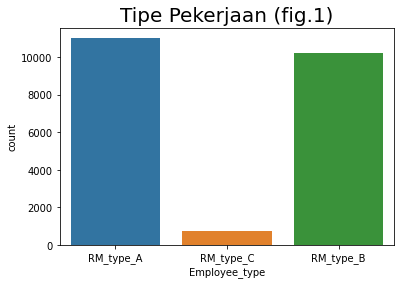

In [23]:
label = ['RM_type_A','RM_type_B','RM_type_C']
sns.countplot(x = "Employee_type", data = data1a)
plt.title("Tipe Pekerjaan (fig.1)", fontsize=20)
plt.show()


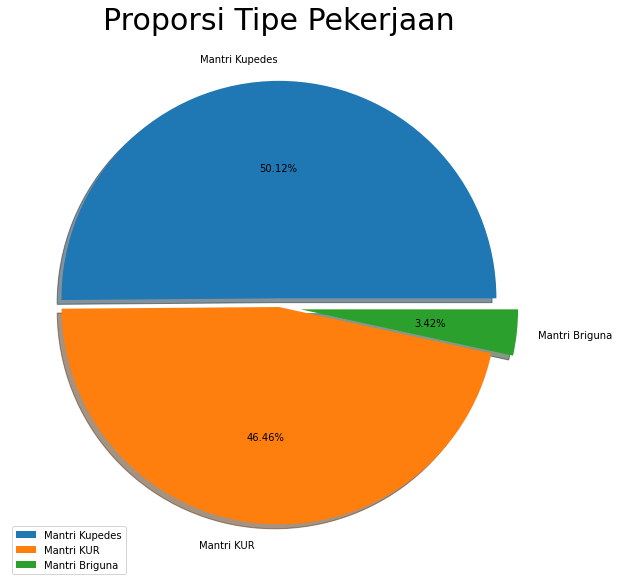

Total Jumlah Pekerja Berdasarkan Tipe Pekerjaan: 

RM_type_A    11030
RM_type_B    10223
RM_type_C      752
Name: Employee_type, dtype: int64


In [24]:
val_data_train = data1a["Employee_type"].value_counts()

label = ['Mantri Kupedes','Mantri KUR','Mantri Briguna']
explode = [0.04, 0, 0.1]

plt.rcParams['figure.figsize']=(12,10)
plt.title("Proporsi Tipe Pekerjaan", fontsize=30)
plt.pie(val_data_train, labels=label, explode=explode, shadow=True, autopct='%.2f%%')
plt.legend()
plt.show()


print("Total Jumlah Pekerja Berdasarkan Tipe Pekerjaan: \n")
print(val_data_train)

In [25]:
data1a["job_duration_as_permanent_worker"].isnull().sum()

2055

In [26]:
data1a["job_duration_as_permanent_worker"]=data1a["job_duration_as_permanent_worker"].fillna(data1a["job_duration_as_permanent_worker"].mean())
data1a["job_duration_as_permanent_worker"].isnull().sum()

0

In [27]:
data1a["GPA"].isnull().sum()

3503

In [28]:
data1a["GPA"]=data1a["GPA"].fillna(data1a["GPA"].mean())
data1a["GPA"].isnull().sum()

0

In [29]:
data1a["Avg_achievement_%"].isnull().sum()

6289

In [30]:
data1a["Avg_achievement_%"]=data1a["Avg_achievement_%"].fillna(data1a["Avg_achievement_%"].mean())
data1a["Avg_achievement_%"].isnull().sum()

0

In [31]:
data1a["Last_achievement_%"].isnull().sum()

6302

In [32]:
data1a["Last_achievement_%"]=data1a["Last_achievement_%"].fillna(data1a["Last_achievement_%"].mean())
data1a["Last_achievement_%"].isnull().sum()

0

In [33]:
data1a["Achievement_above_100%_during3quartal"].isnull().sum()

6302

In [34]:
data1a["Achievement_above_100%_during3quartal"]=data1a["Achievement_above_100%_during3quartal"].fillna(data1a["Achievement_above_100%_during3quartal"].mean())
data1a["Achievement_above_100%_during3quartal"].isnull().sum()

0

In [35]:
data1a["year_graduated"].isnull().sum()

3503

In [36]:
data1a["year_graduated"] = data1a["year_graduated"].fillna(data1a["year_graduated"].mode()[0])
data1a["year_graduated"].isnull().sum()

0

In [37]:
data1a["Education_level"] = data1a["Education_level"].fillna(data1a["Education_level"].mode()[0])
data1a["Education_level"].isnull().sum()

0

In [38]:
data1a["achievement_target_3"].isnull().sum()

6727

In [39]:
data1a["achievement_target_3"].value_counts()

reached        10985
not reached     4275
not_reached       18
Name: achievement_target_3, dtype: int64

In [40]:
data1a["achievement_target_3"].fillna("not_reached", inplace=True)
data1a['achievement_target_3'] = data1a['achievement_target_3'].str.replace('not reached','not_reached')
data1a["achievement_target_3"].value_counts()

not_reached    11020
reached        10985
Name: achievement_target_3, dtype: int64

In [41]:
data1a["achievement_target_3"].isnull().sum()

0

In [42]:
data1a["achievement_target_2"].value_counts()

achiev_< 50%              8615
achiev_50%-100%           2366
Pencapaian < 50%          1542
achiev_> 1.5               954
achiev_100%-150%           925
Pencapaian 50%-100%        484
Tidak diberikan target     176
Pencapaian 100%-150%       145
Pencapaian > 1.5            71
Name: achievement_target_2, dtype: int64

In [43]:
data1a["achievement_target_2"].isnull().sum()

6727

In [44]:
data1a["achievement_target_2"].fillna("achiev_100%-150%", inplace=True)
data1a["achievement_target_2"].isnull().sum()

0

In [45]:
data1a["achievement_target_1"].value_counts()

achiev_50%-100%           7679
achiev_100%-150%          2519
achiev_< 50%              2065
Pencapaian 50%-100%       1531
achiev_> 1.5               597
Pencapaian 100%-150%       485
Tidak diberikan target     178
Pencapaian < 50%           175
Pencapaian > 1.5            49
Name: achievement_target_1, dtype: int64

In [46]:
data1a["achievement_target_1"].fillna("achiev_50%-100%", inplace=True)
data1a["achievement_target_1"].isnull().sum()

0

In [47]:
data2a["achievement_target_3"].fillna("not_reached", inplace=True)
data2a['achievement_target_3'] = data2a['achievement_target_3'].str.replace('not reached','not_reached')
data2a["achievement_target_3"].value_counts()

reached        4342
not_reached    1658
Name: achievement_target_3, dtype: int64

In [48]:
df_train = data1a.copy()
df_test = data2a.copy()

In [49]:
df_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [50]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [51]:
df_train[["age","job_duration_in_current_person_level","job_duration_from_training","Avg_achievement_%","Avg_achievement_%"]].head()

,age,job_duration_in_current_person_level,job_duration_from_training,Avg_achievement_%,Avg_achievement_%
0,1964,8.00,30,68.85,68.85
1,1979,2.00,16,94.81,94.81
2,1980,1.83,15,72.82,72.82
3,1984,4.00,8,86.89,86.89
4,1984,1.83,7,95.17,95.17


In [52]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

df_train["job_level"] = labelEncoder.fit_transform(df_train[["job_level"]].values.ravel())
df_test["job_level"] = labelEncoder.fit_transform(df_test[["job_level"]].values.ravel())

df_train["person_level"] = labelEncoder.fit_transform(df_train[["person_level"]].values.ravel())
df_test["person_level"] = labelEncoder.fit_transform(df_test[["person_level"]].values.ravel())

df_train["Employee_type"] = labelEncoder.fit_transform(df_train[["Employee_type"]].values.ravel())
df_test["Employee_type"] = labelEncoder.fit_transform(df_test[["Employee_type"]].values.ravel())

df_train["Employee_status"] = labelEncoder.fit_transform(df_train[["Employee_status"]].values.ravel())
df_test["Employee_status"] = labelEncoder.fit_transform(df_test[["Employee_status"]].values.ravel())

df_train["gender"] = labelEncoder.fit_transform(df_train[["gender"]].values.ravel())
df_test["gender"] = labelEncoder.fit_transform(df_test[["gender"]].values.ravel())

df_train["number_of_dependences"] = labelEncoder.fit_transform(df_train[["number_of_dependences"]].values.ravel())
df_test["number_of_dependences"] = labelEncoder.fit_transform(df_test[["number_of_dependences"]].values.ravel())


df_train["Education_level"] = labelEncoder.fit_transform(df_train[["Education_level"]].values.ravel())
df_test["Education_level"] = labelEncoder.fit_transform(df_test[["Education_level"]].values.ravel())

df_train["marital_status_maried(Y/N)"] = labelEncoder.fit_transform(df_train[["marital_status_maried(Y/N)"]].values.ravel())
df_test["marital_status_maried(Y/N)"] = labelEncoder.fit_transform(df_test[["marital_status_maried(Y/N)"]].values.ravel())

df_train["year_graduated"] = labelEncoder.fit_transform(df_train[["year_graduated"]].values.ravel())
df_test["year_graduated"] = labelEncoder.fit_transform(df_test[["year_graduated"]].values.ravel())

df_train["achievement_target_1"] = labelEncoder.fit_transform(df_train[["achievement_target_1"]].values.ravel())
df_test["achievement_target_1"] = labelEncoder.fit_transform(df_test[["achievement_target_1"]].values.ravel())

df_train["achievement_target_2"] = labelEncoder.fit_transform(df_train[["achievement_target_2"]].values.ravel())
df_test["achievement_target_2"] = labelEncoder.fit_transform(df_test[["achievement_target_2"]].values.ravel())

df_train["achievement_target_3"] = labelEncoder.fit_transform(df_train[["achievement_target_3"]].values.ravel())
df_test["achievement_target_3"] = labelEncoder.fit_transform(df_test[["achievement_target_3"]].values.ravel())

In [53]:
# X=df_train.drop(columns="achievement_target_3")
# y=df_train.achievement_target_3
# X=pd.get_dummies(X, columns=["achievement_target_1","achievement_target_2"])

In [54]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size = 0.25,
#     random_state = 0
# )

In [55]:
# from sklearn import svm
# svm_model = svm.SVC(kernel='linear', C=1.5)
# svm_model.fit(X_train, y_train)
# svm_model.score(X_train, y_train)

In [56]:
# pred=svm_model.predict(X_test)
# pred[0:5]

job_level                                0.276477
job_duration_in_current_job_level        0.238795
person_level                             0.255295
job_duration_in_current_person_level     0.316725
job_duration_in_current_branch           0.173602
Employee_type                           -0.176557
Employee_status                          0.320438
gender                                  -0.020887
age                                     -0.227028
marital_status_maried(Y/N)               0.293313
number_of_dependences                    0.234995
number_of_dependences (male)             0.164592
number_of_dependences (female)           0.163156
Education_level                          0.002716
GPA                                      0.015617
year_graduated                          -0.106431
job_duration_as_permanent_worker         0.177208
job_duration_from_training               0.249291
branch_rotation                          0.242994
job_rotation                             0.271280


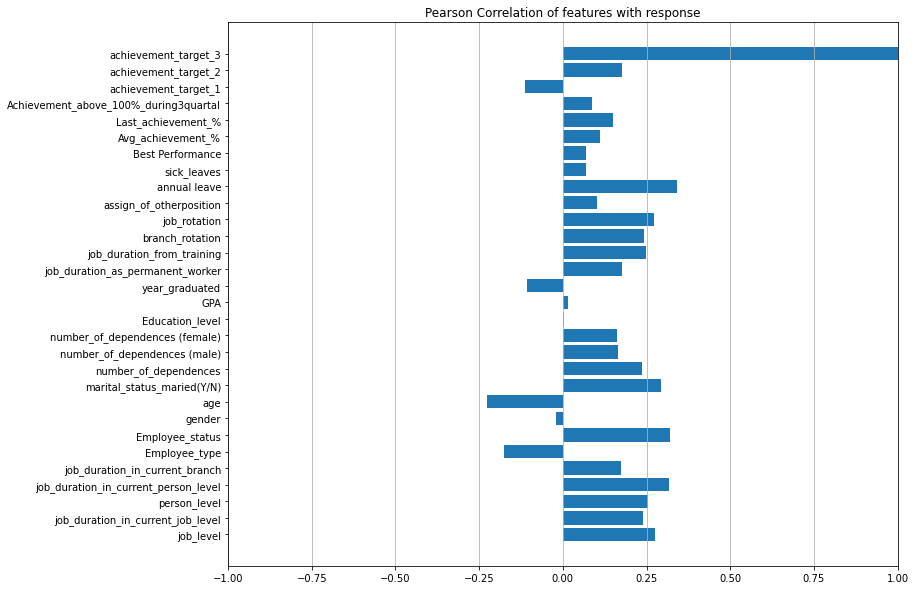

<Figure size 864x720 with 0 Axes>

In [57]:
print(df_train.corr()['achievement_target_3'])
plt.barh(np.arange(len(df_train.corr()['achievement_target_3'])), df_train.corr()['achievement_target_3'],align = 'center',tick_label = df_train.columns)
plt.xlim((-1,1))
plt.grid(axis='x')
plt.title('Pearson Correlation of features with response')
plt.show()

plt.clf()

In [58]:
df_train.drop(df_train[['Achievement_above_100%_during3quartal','Best Performance',
                      'sick_leaves','GPA','Education_level','gender']], axis=1, inplace=True)

In [59]:
df_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'year_graduated', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'Avg_achievement_%',
       'Last_achievement_%', 'achievement_target_1', 'achievement_target_2',
       'achievement_target_3'],
      dtype='object')

memilih fitur dengan nilai korelasi tinggi

In [60]:
# df_train==df_train[['job_level', 'job_duration_in_current_job_level', 'person_level',
#        'job_duration_in_current_person_level',
#        'job_duration_in_current_branch', 'Employee_type', 'Employee_status','age', 'marital_status_maried(Y/N)', 'number_of_dependences',
#        'number_of_dependences (male)', 'number_of_dependences (female)', 'year_graduated',
#        'job_duration_as_permanent_worker', 'job_duration_from_training',
#        'branch_rotation', 'job_rotation','annual leave','Avg_achievement_%',
#        'Last_achievement_%','achievement_target_1', 'achievement_target_2', 'achievement_target_3']]
# df_train.columns

/home/eken/miniconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/eken/miniconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/eken/miniconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

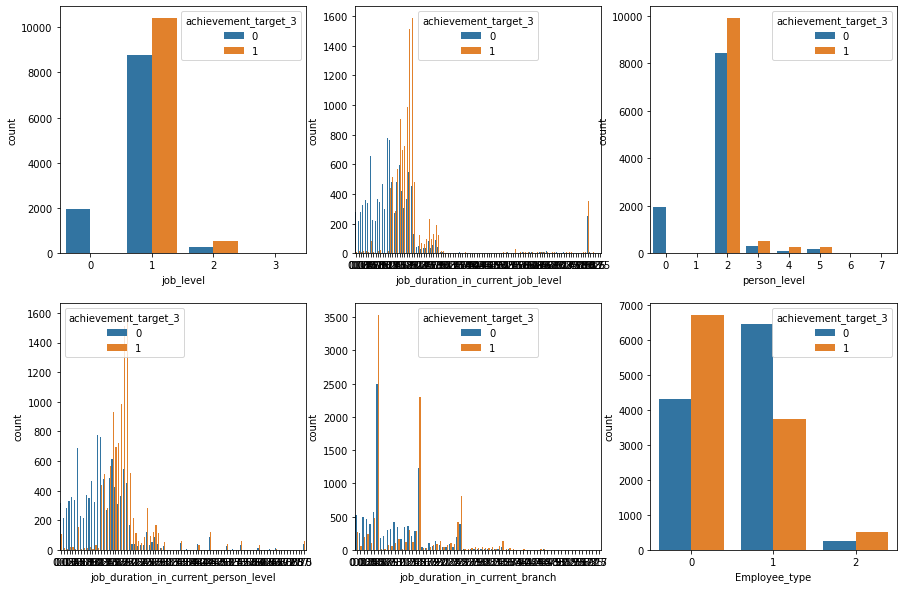

In [61]:
cat_var=['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type']
fig, axes=plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df_train, hue="achievement_target_3", ax=ax)


In [62]:
# X = df_train.drop(['achievement_target_3'],axis=1)
# y = df_train['achievement_target_3']
# sc = StandardScaler()
# X = sc.fit_transform(X)
# rfc = SVC(n_estimators=1000, random_state=0)

# rfc.fit(X, y)


# importances = rfc.feature_importances_

# print(df_train.drop('achievement_target_3', axis=1).columns)

# plt.barh(np.arange(len(df_train.drop('achievement_target_3', axis=1).columns)), importances,align = 'center',tick_label = df_train.drop('achievement_target_3', axis=1).columns)
# plt.xlim((0,0.5))
# plt.grid(axis='x')
# plt.title('SVM importances')
# plt.show()

# plt.clf()

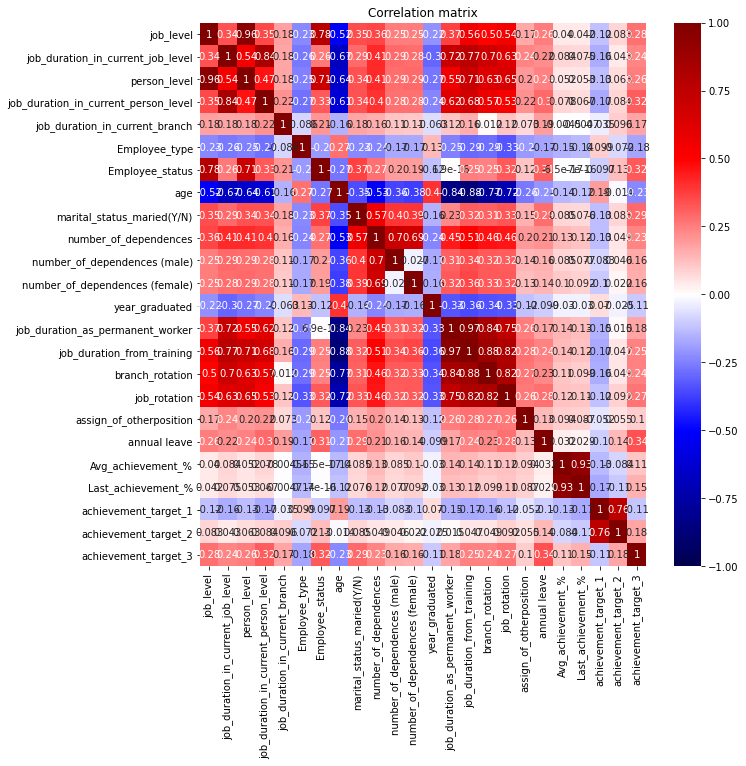

<Figure size 864x720 with 0 Axes>

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)
plt.title('Correlation matrix')
plt.yticks(rotation=0)
plt.show()
plt.clf()

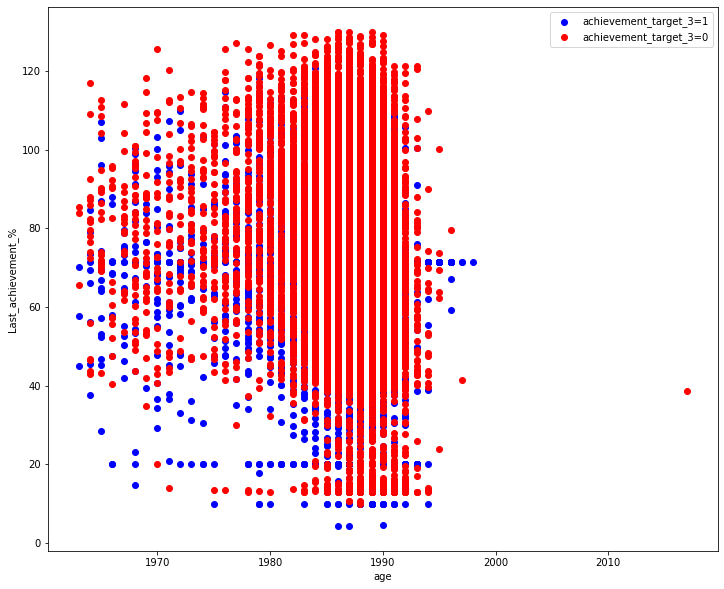

<Figure size 864x720 with 0 Axes>

In [64]:
plt.scatter(df_train.loc[df_train['achievement_target_3'] == 0]['age'],df_train.loc[df_train['achievement_target_3'] == 0]['Last_achievement_%'], color='blue')
plt.scatter(df_train.loc[df_train['achievement_target_3'] == 1]['age'],df_train.loc[df_train['achievement_target_3'] == 1]['Last_achievement_%'], color='red')
plt.legend(['achievement_target_3=1','achievement_target_3=0'])
plt.xlabel('age')
plt.ylabel('Last_achievement_%')
plt.show()
plt.clf()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [78]:
X = df_train.drop(columns="achievement_target_3")
y = df_train.achievement_target_3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17604, 23), (4401, 23), (17604,), (4401,))

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust"), ["job_duration_in_current_job_level","job_duration_in_current_person_level","job_duration_in_current_branch",
                            "age","number_of_dependences","number_of_dependences (male)","number_of_dependences (female)","year_graduated",
                            "job_duration_as_permanent_worker","job_duration_from_training","branch_rotation","job_rotation",
                            "assign_of_otherposition","annual leave"]),
    ('categoric', cat_pipe(encoder='onehot'), ["job_level","person_level","Employee_type","achievement_target_1",
                                               "achievement_target_2","marital_status_maried(Y/N)","Employee_status"]),
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])



model = GridSearchCV(pipeline, gsp.svm_params, cv=4, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 49 candidates, totalling 196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
print('Best F1 score = ' + str(grid.best_score_)+ 'at')
print(grid.best_params_)